In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import finoptions as fo
import warnings
warnings.filterwarnings('ignore')
import itertools
np.set_printoptions(formatter={'float': lambda x: "{0:0.2f}".format(x)})

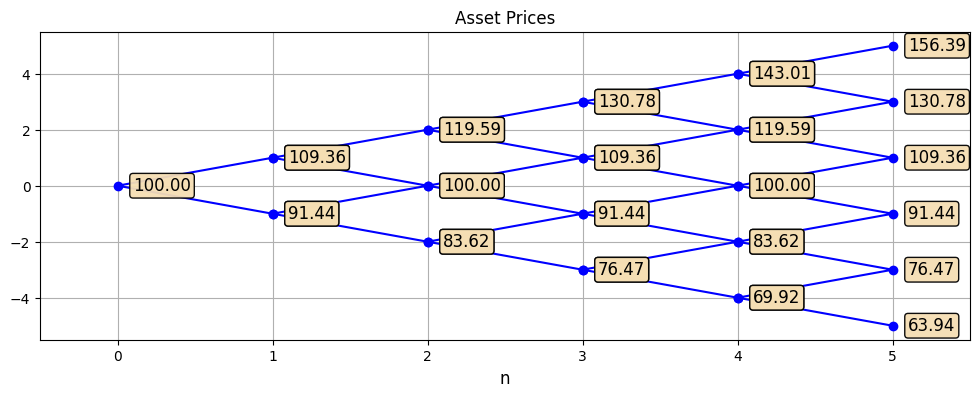

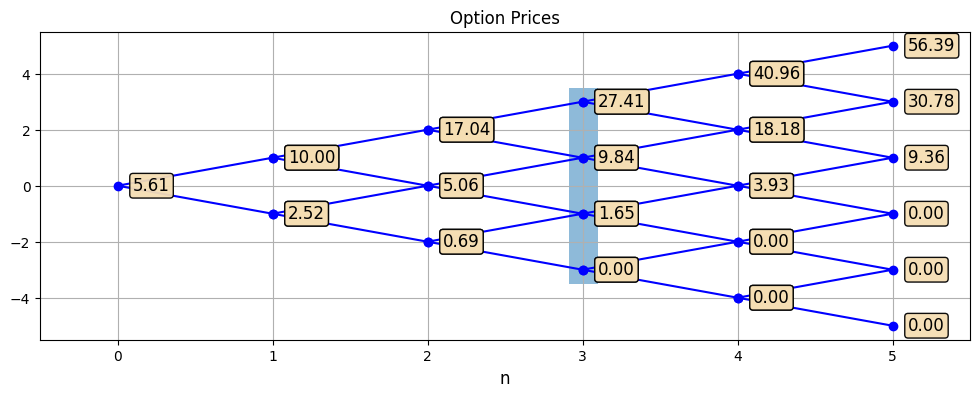

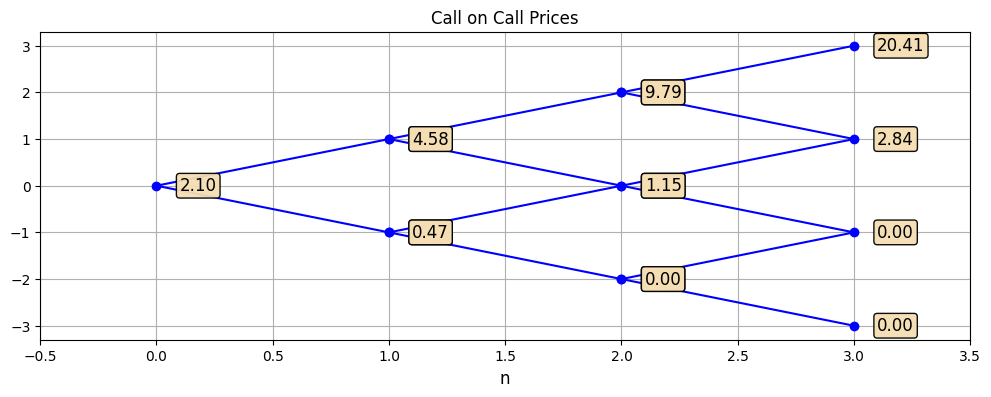

In [2]:
from bin_tree_plotter import BiTreePlotter

def binomial_tree_asset_prices(S, T, r, sigma, n):
    up = np.exp(sigma*np.sqrt(T/n))
    down = np.exp(-sigma*np.sqrt(T/n))

    # Initialize the asset prices at each node
    asset_prices = np.zeros((n + 1, n + 1))
    for i in range(n + 1):
        for j in range(i + 1):
            asset_prices[j, i] = S * (up ** (i - j)) * (down ** j)

    return asset_prices

S = 100
K = 100
T = 12/12
r = 0.1
d = 0.15
sigma = 0.2
n = 5
type='european'

R = (1+r)**(T/n)
D = (1+d)**(T/n)

up = np.exp(sigma*np.sqrt(T/n))
down = np.exp(-sigma*np.sqrt(T/n))

q = (R/D-down)/(up-down)

asset_prices = binomial_tree_asset_prices(S, T, r, sigma, n)

# PLota o gráfico
_ = BiTreePlotter(asset_prices).plot(title='Asset Prices')


options = np.clip(asset_prices-K, 0, np.inf)
for i in np.arange(len(options)-2, -1, -1):
    prices_node = options[::,i+1]
    option_prices = options[::,i][:i+1]
    for idx, node_opt in enumerate(option_prices):
        vup, vdown =  prices_node[idx:idx+2]
        v = (1/R)*(q*vup+(1-q)*vdown)
        options[idx, i] = v

_ = BiTreePlotter(options).plot(title='Option Prices', shade_step=3)


T = 3

R = (1+r)**(T/n)
D = (1+d)**(T/n)

call_on_call = np.clip(options-7, 0, np.inf)[:,:T+1][:T+1]
for i in np.arange(len(call_on_call)-2, -1, -1):
    prices_node = call_on_call[::,i+1]
    option_prices = call_on_call[::,i][:i+1]
    for idx, node_opt in enumerate(option_prices):
        vup, vdown =  prices_node[idx:idx+2]
        v = (1/R)*(q*vup+(1-q)*vdown)
        call_on_call[idx, i] = v

_ = BiTreePlotter(call_on_call).plot(title='Call on Call Prices')

In [2]:
call_on_call[0][0]

2.1035768654203375

In [7]:
dt = 1
sigma = 0.01
dR = sigma*np.sqrt(3*dt)
alpha1 = 0.05205

pua, pub, puc, pud, pue, puf, pug, puh, pui = 0.1667, 0.1217, 0.1667, 0.2217, 0.8867, 0.1217, 0.1667, 0.2217, 0.0867
pma, pmb, pmc, pmd, pme, pmf, pmg, pmh, pmi = 0.6666, 0.6566, 0.6666, 0.6566, 0.0266, 0.6566, 0.6666, 0.6566, 0.0266
pda, pdb, pdc, pdd, pde, pdf, pdg, pdh, pdi = 0.1667, 0.2217, 0.1667, 0.1217, 0.0867, 0.2217, 0.1667, 0.1217, 0.8867


RA, RB, RC, RD, RE, RF, RG, RH, RI = 0 , 1*dR , 0*dR , -1*dR , 2*dR , 1*dR , 0*dR , -1*dR , -2*dR

r11 = RB + alpha1
r10 = RC + alpha1
r1x = RD + alpha1

Q11 = 0.1604
Q10 = 0.6417
Q1x = 0.1604

Q22 = Q11 * pub * np.exp(-r11*dt)
Q21 = Q11 * pmb * np.exp(-r11*dt) + Q10 * puc * np.exp(-r10*dt)
Q20 = Q11 * pdb * np.exp(-r11*dt) + Q10 * pmc * np.exp(-r10*dt) +  Q1x * pud * np.exp(-r1x*dt)
Q2x = Q10 * pdc * np.exp(-r10*dt) + Q1x * pmd * np.exp(-r1x*dt)
Q2z = Q1x * pdd * np.exp(-r1x*dt)

P3 = np.exp(-3*0.05086)
alpha2 = np.log((Q22 * np.exp(-RE) + Q21 * np.exp(-RF) + Q20 * np.exp(-RG) + Q2x * np.exp(-RH) + Q2z * np.exp(-RI))/P3)
alpha2

0.06253927842517272